In [1]:
import warnings
warnings.simplefilter("ignore")


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

X = pd.read_csv('X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [22]:
X.head(2)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0


Metodos de evaluación
Por ahora hemos visto que:

Se necesita separar de forma aleatoria en datos de entrenamiento y testeo para poder evaluar performance del algoritmo
Existen diversas métricas para evaluar performance, y elegimos la nuestra según las caracteristicas de nuestro problema
Es útil apoyar la evaluación con visualizaciones de errores, como por ejemplo scatterplots de residuales
Sin embargo nuestro método hasta ahora tiene una falla. Este depende de la forma en que fueron elegidos nuestros datos de forma aleatoria:

Podemos tener suerte y caer en un train set y test set que sea ideal para nuestro modelo.
Podemos tener pésima performance con esa separación de datos pero no en otros.
Controlar la aleatoridad en train_test_split

train_test_split separa cada vez que lo llamamos los datos de forma diferente. Para poder comparar modelos, hacer un código más limpio y compacto y para poder hacer nuestros experimentos reproducibles utilizaremos el parametro random_state.



In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y,random_state=1)
pd.DataFrame.equals(X_train,X2_train)

True

In [14]:
from sklearn.linear_model import Lasso

Lasso().fit(X_train,y_train).score(X_test,y_test)


0.79261902949633622

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores
scores.mean()

0.4496402174579181

In [23]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results

{'fit_time': array([ 0.00775623,  0.01398706,  0.03290987,  0.01003933,  0.00607181]),
 'score_time': array([ 0.00201058,  0.00233412,  0.00203443,  0.02795458,  0.00115991]),
 'test_score': array([ 0.59316596,  0.68931527,  0.55383855,  0.18147236,  0.23040894]),
 'train_score': array([ 0.68988012,  0.77004932,  0.76604995,  0.76123379,  0.75837599])}

In [24]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.749117836304
0.449640217458


# Validation Curves y Learning Curves



In [25]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(), X, y, cv=5)

{'fit_time': array([ 0.00457287,  0.00407457,  0.00400352,  0.00360894,  0.00419879]),
 'score_time': array([ 0.00508165,  0.00631166,  0.00643182,  0.0054338 ,  0.00512695]),
 'test_score': array([ 0.3647382 ,  0.59274527,  0.21545625,  0.15143495,  0.25635077])}

In [26]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)

{'fit_time': array([ 0.00418663,  0.00232911,  0.00404882,  0.00319505,  0.0048058 ]),
 'score_time': array([ 0.00491691,  0.00409842,  0.00422382,  0.00700116,  0.00618291]),
 'test_score': array([ 0.23553954,  0.61921355,  0.24881301,  0.1209604 ,  0.2466995 ])}

In [27]:
from sklearn.model_selection import validation_curve

n = np.arange(2,50,2)
train_scores,test_scores = validation_curve(KNeighborsRegressor(),X,y,param_name='n_neighbors',param_range=n,cv=5)
np.mean(train_scores,axis=1)

array([ 0.86831591,  0.79120817,  0.7593398 ,  0.7498298 ,  0.74238245,
        0.73284018,  0.72586058,  0.71779833,  0.71281982,  0.70976325,
        0.70723469,  0.70502429,  0.70174649,  0.69741543,  0.69379214,
        0.69163113,  0.68955146,  0.6862285 ,  0.68321376,  0.68018032,
        0.67885534,  0.67522056,  0.67135123,  0.66953759])

In [28]:
n.shape

(24,)

([<matplotlib.axis.XTick at 0x7fbb8003a198>,
 <a list of 24 Text xticklabel objects>)

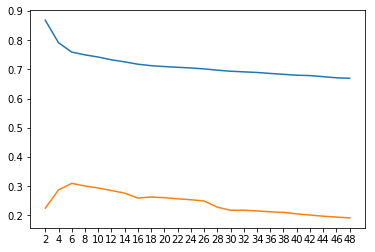

In [29]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n)

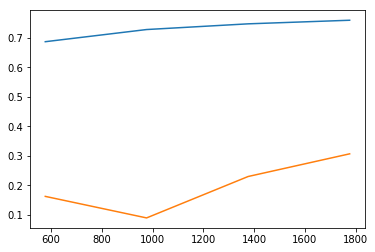

In [30]:
from sklearn.model_selection import learning_curve

lcurve = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)
samples,train,test = lcurve[0], lcurve[1],lcurve[2]
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])